In [6]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

In [3]:
data = pd.read_csv('data3a.csv')

In [4]:
data['f_int'] = (data.f == 'T').astype(int)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
y        100 non-null int64
x        100 non-null float64
f        100 non-null object
f_int    100 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.2+ KB


In [7]:
np.random.seed(10)
data['y_rand'] = np.random.poisson(data.y.mean(),100)
data.x_c = sm.add_constant(data['x'])

result1 = sm.GLM(data.y_rand,data.x_c['const'],family=sm.families.Poisson()).fit()
result2 = sm.GLM(data.y_rand,data.x_c,family=sm.families.Poisson()).fit()
deltaD = result1.deviance - result2.deviance


In [8]:
deltaD

2.7068337885096412

In [12]:
def get_dd(data):
    data.x_c = sm.add_constant(data.x)
    data['y_rand'] = np.random.poisson(data.y.mean(),100)
    result = sm.GLM(data.y_rand,data.x_c,family=sm.families.Poisson()).fit()
    return result.null_deviance - result.deviance

def pb(data,n_bootstrap):
    return np.array([get_dd(data) for i in range(n_bootstrap)])

dd12 = pb(data,1000)

In [13]:
dd12 = pd.Series(dd12)
dd12.head()

0    0.297472
1    1.680472
2    0.053576
3    0.164516
4    0.094863
dtype: float64

In [14]:
dd12.describe()

count    1000.000000
mean        1.005851
std         1.521332
min         0.000006
25%         0.079729
50%         0.425951
75%         1.307838
max        19.358259
dtype: float64

(array([ 359.,  118.,   89.,   79.,   39.,   33.,   44.,   32.,   25.,
          16.,   21.,   12.,   18.,   11.,   15.,    7.,    7.,    8.,
           3.,    5.,    6.,    7.,    3.,    7.,    4.,    3.,    3.,
           3.,    4.,    3.,    1.,    0.,    2.,    1.,    1.,    3.,
           0.,    1.,    1.,    0.,    4.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([  5.79510294e-06,   1.93588326e-01,   3.87170857e-01,
          5.80753388e-01,   7.74335919e-01,   9.67918449e-01,
          1.16150098e+00,   1.35508351e+00,   1.54866604e+00,
          1.74224857e+00

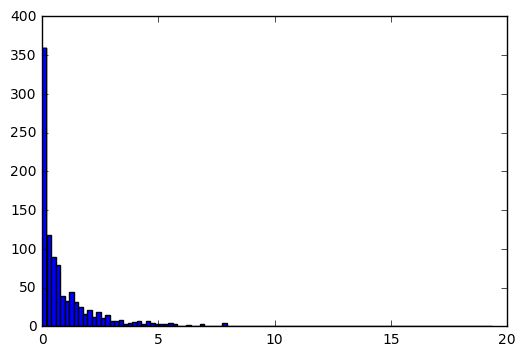

In [15]:
plt.hist(dd12,bins=100)

In [16]:
(dd12 >= 4.5).sum()

43

In [17]:
dd12.quantile(0.95)

4.132292196405599

In [18]:
P = stats.chi2.sf(x=4.5,df=1)

In [19]:
P

0.033894853524689295